# Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx

%config InlineBackend.figure_format='retina'

%load_ext autoreload
%autoreload 2

# Выделение сообществ

__Авторы задач: Макрушин С.В (SVMakrushin@fa.ru), Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. "Лекция 3: Выделение сообществ"
* Документация:
    * https://networkx.org/documentation/stable/reference/algorithms/community.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.linalg.graphmatrix.adjacency_matrix.html
    * https://networkx.org/documentation/networkx-1.10/reference/generators.html
    * https://seaborn.pydata.org/generated/seaborn.heatmap.html

## Плотность и модулярность

1.1 Взять сеть размером от 15 до 40 узлов и создать не менее 5 разбиений этой сети на 2 сообщества (часть разбиений должны частично или полностью соответствовать интуитивным представлениям о разбиении на сообщества, часть - нет). Визуализировать результаты.

Можно выделить 4 пересекающихся категори методов выявления сообществ:
- Узло-центричные (node-centric) сообщества - все узлы сообества удовлетворяют некоторым
критериям
- Сете-центричные (network-centric) сообщества - задача разбиения сети в целом на несколько
непересекающихся множеств
    - Node Similarity
    - Latent Space Models
    - Modularity maximization
    - Cut Minimization
    - Block-Model Approximation
- Группо-центричные (group-centric) сообщества - рассматриваются связи внутри группы, группа в
целом (не опускаясь до уровня узлов) удовлетворяет определенным критериям
- Иерархо-центричные (hierarchy-centric) сообщества - построение иерархической структуры
сообществ

1.2 Для разбиений из 1.1 и всей сети рассчитать плотность и модулярность.

## Алгоритм Гирвана-Ньюмена. Лувенский алгоритм.

2.1 Считать сеть из файла `communities.edgelist`. Выполнить разбиение сети на 2 сообщества с помощью алгоритма Гирвана-Ньюмена. Визуализировать результат, раскрасив узлы в цвет, соответствующий их сообществу.

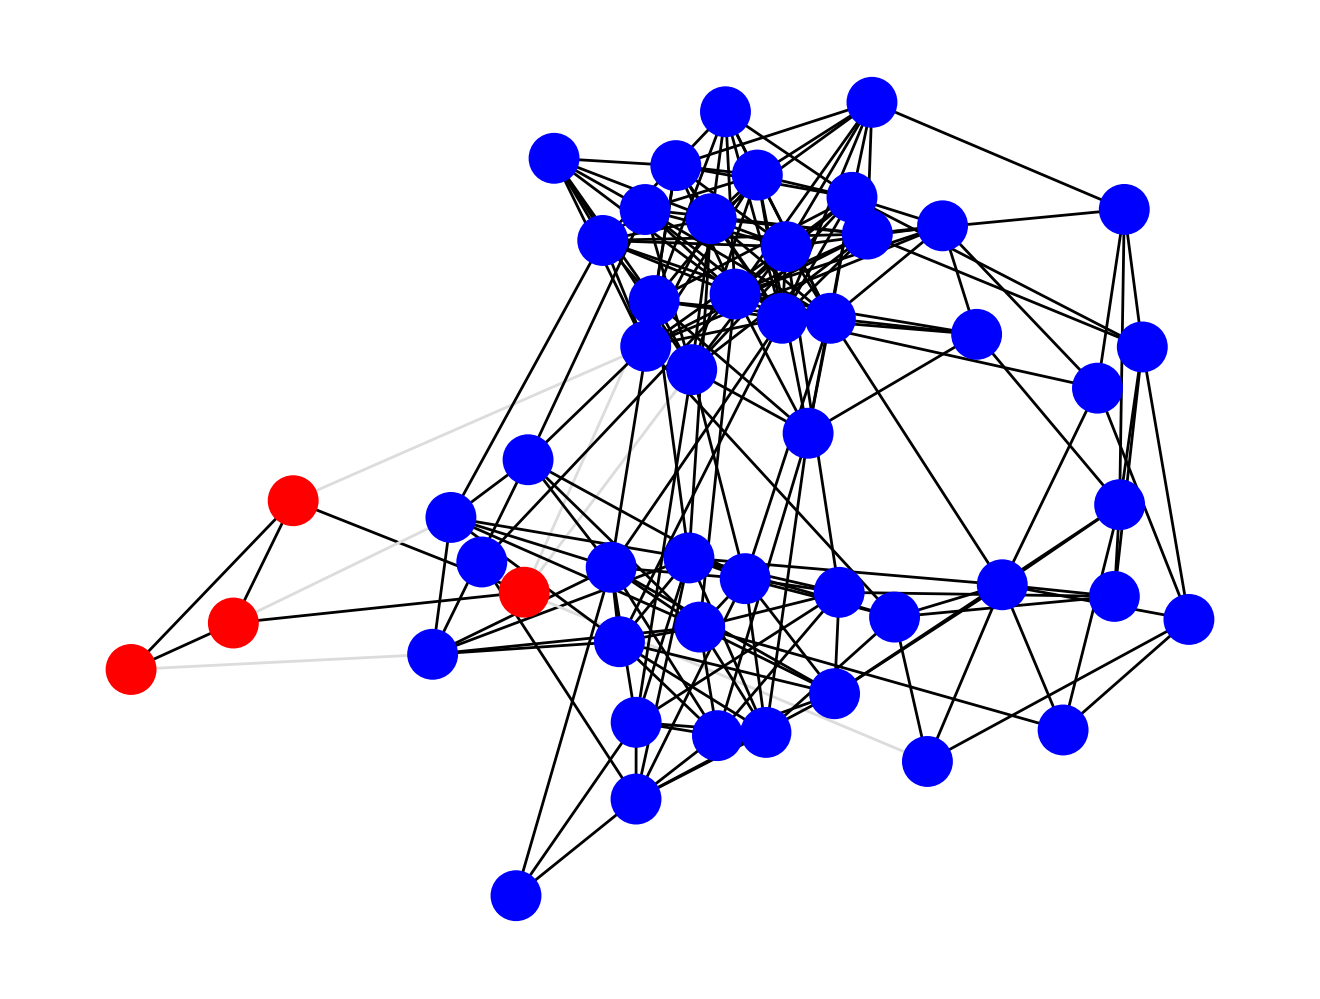

In [3]:
G = nx.read_edgelist('data/communities.edgelist')
partitions = list(nx.community.girvan_newman(G))

for partition in partitions:
    if len(partition) == 2:
        break
    
node_to_color = {}
for i, group in enumerate(partition):
    if i == 0:
        color = 'red'
    elif i == 1:
        color = 'blue'
    else:
        raise ValueError('Ожидалось только две группы')
    
    for node in group:
        node_to_color[node] = color
        
node_colors = [node_to_color[node] for node in G.nodes]

edge_colors: list[str] = []

for node1, node2 in G.edges:
    if node_to_color[node1] == node_to_color[node2]:
        edge_colors.append('black')
    else:
        edge_colors.append('gainsboro')

nx.draw(G, node_color=node_colors, edge_color=edge_colors)

2.2 Показать график динамики модулярности для шагов алгоритма алгоритма Гирвана-Ньюмена и визуализировать разбиение сети из 2.1 при наилучшей модулярности. Для визуализации требуется выбрать несколько цветов (в соответствии с количеством выделенных сообществ) и раскрасить узлы и связи в рамках одного сообщества этими цветами. Связи между узлами, состоящими в разных сообществах, отрисовать черным цветом. 

2.3 Выполнить разбиение сети из 2.1 на сообщества с помощью Лувенского алгоритма. Визуализировать результат аналогично заданию 2.2.

2.4 Визуализировать матрицу смежности сети из 2.1 при помощи `sns.heatmap`. Получить и визуализировать матрицу смежности для сети, в которой узлы перенумерованы в порядке возрастания номера сообщества, которому они принадлежат (т.е. номера $0...C_1-1$ даются $C_1$ узлам, принадлежащим первому сообществу; номера $C_1...C_2-1$ даются $C_2$ узлам, принадлежащим второму сообществу и т.д.). Для выделения сообществ использовать Лувенский алгоритм.

2.5 $(*)$ Создать собственную реализацию алгоритма Гирвана-Ньюмена. Для нее выполнить визуализацию результата алгоритма.

## "Дискретный" алгоритм распространения меток

3.1. Визуализировать разбиение сети карате клуба на сообщества с помощью реализации алгоритма распространения меток из `networkx`.

# Часть для получения баллов вне семинаров

## 3.2, 3.3 (2 балла)

3.2 Реализовать алгоритм распространения меток. Решить с его помощью задачу 3.1. Визуализировать пошаговую динамику распространения меток и итоговое разбиение сети.

3.3 $(*)$ Выполнить разбиение сети на сообщества на основании множественного повторения дискретного label propagation по следующему принципу: если узлы часто оказываются в одном сообществе (при различных запусках алгоритма), то считать, что действительно находятся в одном сообществе.

## 4.1 (2 балла)

4.1 Реализовать лувенский алгоритм. Визуализировать разбиение сети карате клуба на сообщества.